### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

/Users/vymo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.12.0'

In [0]:
tf.__version__

'1.6.0'

### Collect Data

In [28]:
import tensorflow.keras as keras

In [146]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [147]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [151]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

In [32]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

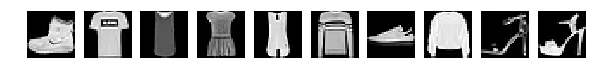

label for each of the above image:
 [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [69]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
columns = 10
rows = 1
labels = []
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(trainX[i],cmap='gray')
    labels.append(trainY[i].tolist().index(1))
plt.show()
print("label for each of the above image:\n", labels)

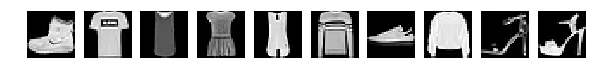

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [217]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [218]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 1.6697 - acc: 0.6044
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.0165 - acc: 0.7214
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.7897 - acc: 0.7610
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.6835 - acc: 0.7878
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.6243 - acc: 0.7993
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.5904 - acc: 0.8054
Epoch 7/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.5625 - acc: 0.8122
Epoch 8/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.5530 - acc: 0.8137
Epoch 9/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.5361 - acc: 0.8196
Epoch 10/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.5344 - acc: 0.8167

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [219]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [220]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.8682 - acc: 0.5519
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 1.2091 - acc: 0.7000
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.9065 - acc: 0.7337
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7646 - acc: 0.7534
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.6857 - acc: 0.7680
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.6344 - acc: 0.7788
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.5976 - acc: 0.7903
Epoch 8/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.5690 - acc: 0.7988
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5463 - acc: 0.8082
Epoch 10/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5269 - acc: 0.8131

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [221]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [222]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 2.2827 - acc: 0.1762
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 2.1481 - acc: 0.4284
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 2.0461 - acc: 0.5126
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 1.9496 - acc: 0.5390
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.8575 - acc: 0.5619
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.7695 - acc: 0.5757
Epoch 7/10
60000/60000 [==============================] - 2s 42us/step - loss: 1.6854 - acc: 0.5933
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.6066 - acc: 0.6051
Epoch 9/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.5328 - acc: 0.6249
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.4646 - acc: 0.6394

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [172]:
model = keras.Sequential([
    keras.layers.Reshape((784,),input_shape=(28,28,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.SGD(lr=0.03), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
model.fit(trainX, trainY, batch_size=64,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 58us/step - loss: 1.3203 - acc: 0.6601
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.7063 - acc: 0.7612
Epoch 3/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.5831 - acc: 0.7932
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.5216 - acc: 0.8156
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4851 - acc: 0.8285
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4594 - acc: 0.8363
Epoch 7/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4407 - acc: 0.8433
Epoch 8/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4253 - acc: 0.8492
Epoch 9/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4146 - acc: 0.8527
Epoch 10/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.4043 - acc: 0.8564

## Review model

In [175]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_22 (Reshape)         (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_88 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_90 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


In [174]:
score = model.evaluate(trainX, trainY, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8633166666666666


### Run the model

In [176]:
predicted_labels = model.predict(testX)

In [177]:
predicted_labels[0]

array([3.3697122e-04, 4.3922430e-04, 6.9375493e-04, 1.1766410e-03,
       4.2662522e-04, 1.3289401e-01, 4.7450361e-04, 2.3038130e-01,
       1.0507714e-02, 6.2266928e-01], dtype=float32)

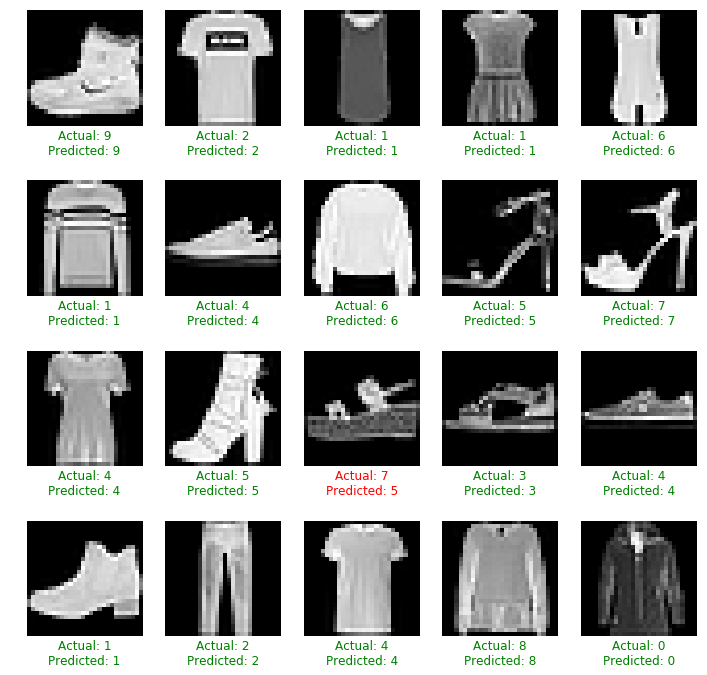

In [204]:
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 4
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.imshow(trainX[i],cmap='gray')
    actual = testY[i].tolist().index(1)
    predicted = predicted_labels[i].argmax()
    plt.title("Actual: "+ str(actual) + "\nPredicted: "+ str(predicted), 
              y=-0.3, color='green' if actual == predicted else 'red')
    labels.append(testY[i].tolist().index(1))
    plabels.append(predicted_labels[i].argmax())
plt.show()